## Calculating Pi

This was an out-of-date example on how to calculate Pi used in my old Monte Carlo notes. These have been taken over by Prof. Allen who is doing an excellent job, so its just left here for interest. 

Please wait, this render takes time... ETA to follow
ETA 14.451446056365967 s
ETA 13.748770713806152 s
ETA 13.230228265126545 s
ETA 12.274824142456055 s
ETA 10.971184015274048 s
ETA 9.258426825205486 s
ETA 7.271094151905604 s
ETA 5.03613954782486 s
ETA 2.62686785062154 s


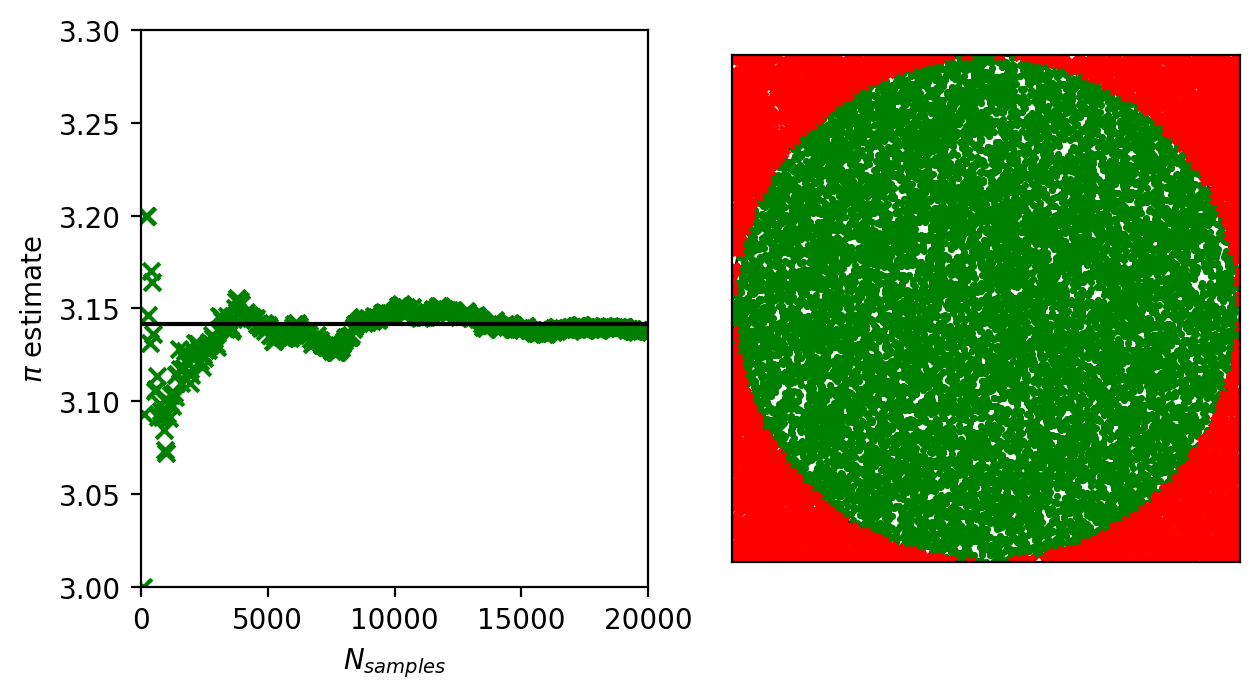

In [1]:
import random
import random
from IPython.display import HTML
import math
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt

import time

def ReportProgress(position, total):
    global startTime
    if position == 0:
        return
    elapsedTime = time.time() - startTime
    totalTime = elapsedTime * total / position
    etr = totalTime - elapsedTime
    print("ETA",etr,"s")

# Make the figures a useful size
scale = 0.5
fig=plt.figure(figsize=(12.80*scale, 7.20*scale), dpi=100/scale, facecolor='w', edgecolor='k')
# Use actual latex for the figures (not built in support)
# Doesn't work on Google colab
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

def circle_drop_test():
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    return x**2 + y**2 < 1, x, y

runs= 400 #Frames
samples_per_run = 50

plt.clf()
plt.subplot(1,2,2)
axis = plt.gca() #Get the Current Axis (GCA) of the current figure
axis.add_artist(plt.Circle((0,0),1, fill=False)) #Draw a circle at 0,0 with radius 1
axis.set_aspect('equal', 'box') # Give us a nice square plot
axis.set_xlim(-1,1) # set the limits of the plot to exactly around the circle
axis.set_ylim(-1,1) # ...
axis.get_xaxis().set_visible(False)
axis.get_yaxis().set_visible(False)
    
in_samples=np.zeros((samples_per_run * runs,2))
out_samples=np.zeros((samples_per_run * runs,2))
in_scatter = axis.scatter(in_samples[0:0,0], in_samples[0:0,1], s=10, c='g', marker=".")
out_scatter = axis.scatter(out_samples[0:0,0], out_samples[0:0,1], s=10, c='r', marker="x")

plt.subplot(1,2,1)
axis = plt.gca()
pi_samples = np.zeros((runs, 2))
pi_scatter = axis.scatter(pi_samples[0:0,0], pi_samples[0:0,1], c='g', marker='x')
axis.set_xlabel("$N_{samples}$")
axis.set_ylabel("$\pi$ estimate")
axis.set_xlim(0, runs * samples_per_run) # set the limits of the plot to exactly around the circle
axis.set_ylim(3.0, 3.3) # ...
plt.plot([0, runs * samples_per_run], [math.pi, math.pi], 'k-')
plt.tight_layout()

in_idx=0
out_idx=0
def timestep(step):
    global in_idx, out_idx
    if step == 0:
        return in_scatter, out_scatter, pi_scatter
    
    global in_samples, out_samples, pi_samples
    for i in range(samples_per_run):
        idx = samples_per_run * (step - 1) + i
        inout, x, y = circle_drop_test()
        if inout:
            in_samples[in_idx] = [x,y]
            in_idx += 1
        else:
            out_samples[out_idx] = [x,y]
            out_idx += 1
    endidx = samples_per_run * step
    if not samples_per_run*step % 2000:
        ReportProgress(samples_per_run*step, samples_per_run * runs)
    in_scatter.set_offsets(in_samples[:in_idx])
    out_scatter.set_offsets(out_samples[:out_idx])
    pi = (4.0*in_idx)/(in_idx+out_idx)
    
    pi_samples[step] = [step * samples_per_run, pi]
    pi_scatter.set_offsets(pi_samples[:step])
    return in_scatter, out_scatter, pi_scatter

print("Please wait, this render takes time... ETA to follow")
startTime = time.time()
anim = animation.FuncAnimation(plt.gcf(), timestep, range(runs), interval=10, blit=True)
HTML(anim.to_html5_video())